In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
IMAGES_PATH = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/images/train/"
LABELS_PATH = "../input/table-tennis-ball-position-detection-dataset/openttgames/openttgames/labels/train/"

IMAGE_FILE_NAME = "1000_2.png"
image = cv2.imread(IMAGES_PATH + IMAGE_FILE_NAME, cv2.IMREAD_COLOR)

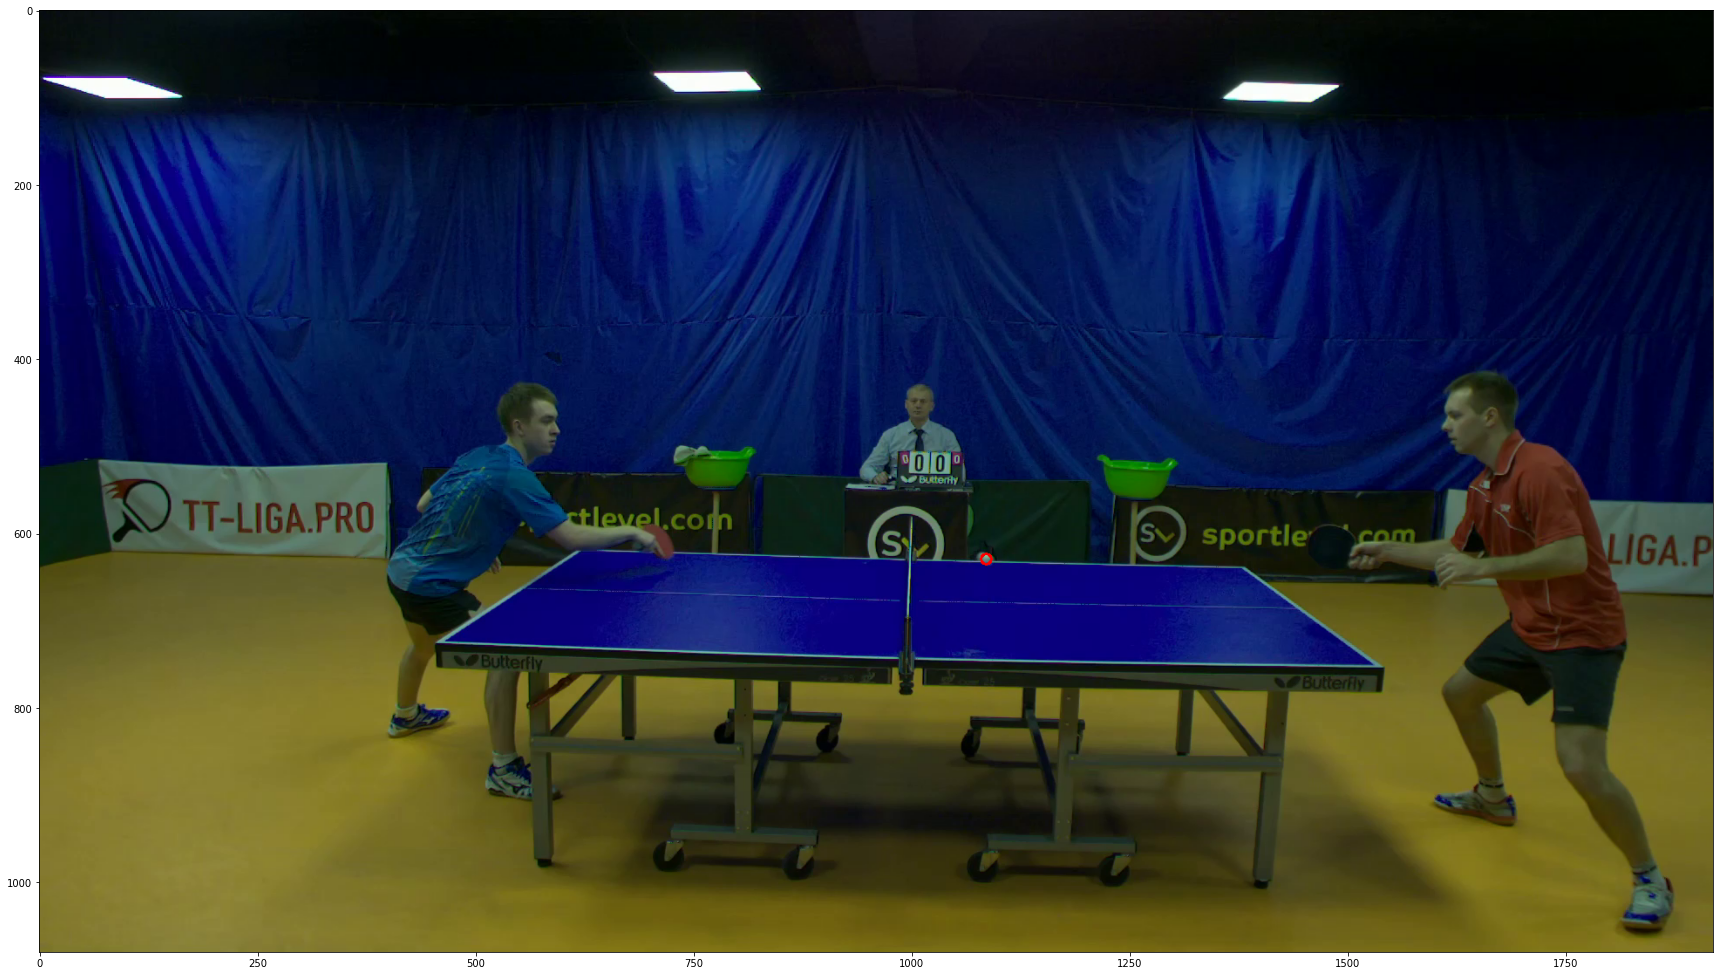

In [3]:
# YOLO format <object-class> <x> <y> <width> <height>

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

with open(LABELS_PATH + IMAGE_FILE_NAME[:-4] + ".txt") as label:
    data = map(float, label.readline().split())
    list_of_yolo_data = list(data)

if list_of_yolo_data:
    # For rectangle
    x1 = int(width * list_of_yolo_data[1] - width * list_of_yolo_data[3] / 2)
    y1 = int(height * list_of_yolo_data[2] - height * list_of_yolo_data[4] / 2)
    x2 = int(width * list_of_yolo_data[1] + width * list_of_yolo_data[3] / 2)
    y2 = int(height * list_of_yolo_data[2] + height * list_of_yolo_data[4] / 2)
#     cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    # For cicle
    X = int(width * list_of_yolo_data[1])
    Y = int(height * list_of_yolo_data[2])
    R = int(max(width * list_of_yolo_data[3] / 2, height * list_of_yolo_data[4] / 2))
    cv2.circle(image_rgb, (X, Y), R, (255, 0, 0), 2)
    
    
fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(image_rgb)

In [4]:
image_files = os.listdir(IMAGES_PATH)
first_game_file_counter = 0
second_game_file_counter = 0
third_game_file_counter = 0
game_file_counter = 0

for file in image_files:
    if "_2" in file:
        second_game_file_counter += 1
    elif "_3" in file:
        third_game_file_counter += 1    
    else:
        first_game_file_counter += 1
        
print("All files ", len(image_files))
print("First game files quantity: ", first_game_file_counter)
print("Second game files quantity: ", second_game_file_counter)
print("Third game files quantity: ", third_game_file_counter)

All files  31518
First game files quantity:  6799
Second game files quantity:  17444
Third game files quantity:  7275


In [5]:
label_files = os.listdir(LABELS_PATH)
first_game_file_counter = 0
second_game_file_counter = 0
third_game_file_counter = 0

for file in label_files:
    if "_2.txt" in file:
        second_game_file_counter += 1
    elif "_3.txt" in file:
        third_game_file_counter += 1
    else:
        first_game_file_counter += 1
        
print("All files ", len(label_files))
print("First game files quantity: ", first_game_file_counter)
print("Second game files quantity: ", second_game_file_counter)
print("Third game files quantity: ", third_game_file_counter)


All files  31157
First game files quantity:  6721
Second game files quantity:  17275
Third game files quantity:  7161


In [6]:
images_without_labels = []

for image_file in image_files:
    label_file = image_file[:-4] + ".txt"
    if label_file not in label_files:
        images_without_labels.append(image_file)
print("Images without labels: ", len(images_without_labels))

Images without labels:  361


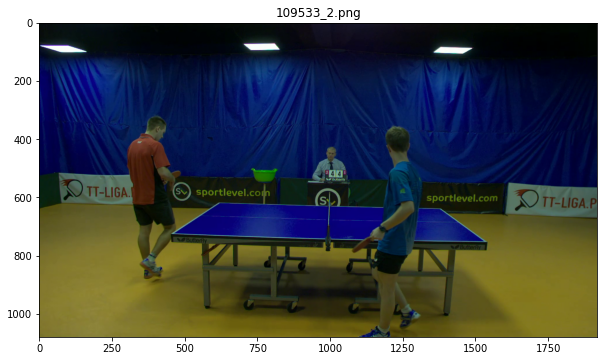

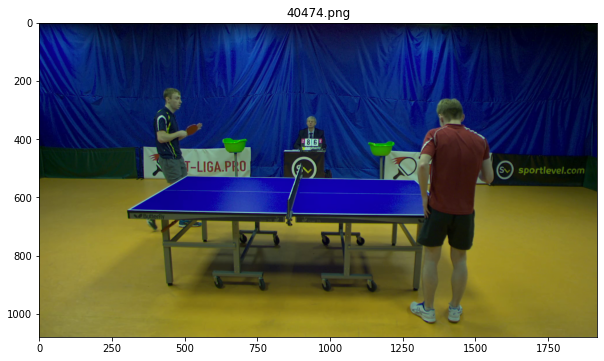

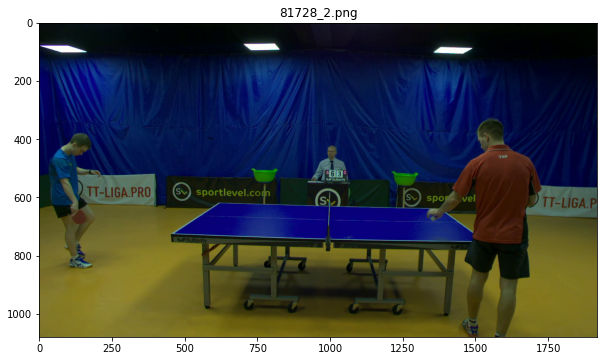

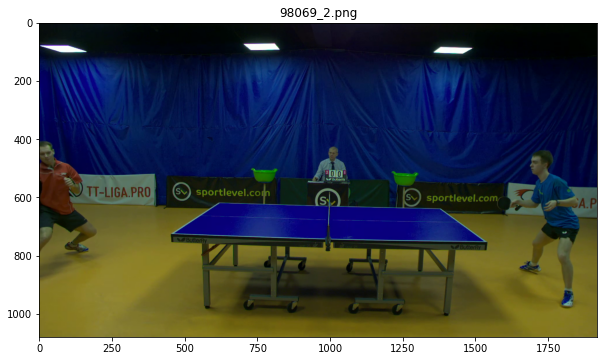

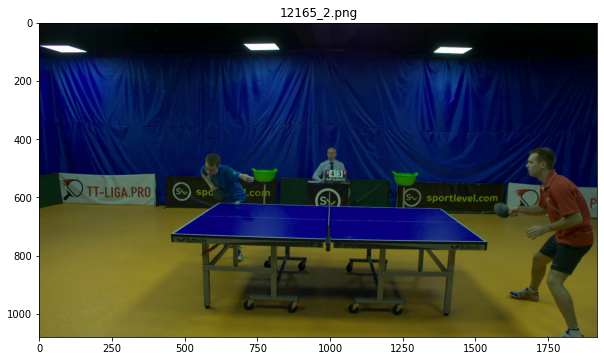

In [7]:
for i in range(5):
    image = cv2.imread(IMAGES_PATH + images_without_labels[i], cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(images_without_labels[i])
    ax.imshow(image_rgb)